In [1]:
import pandas as pd
import seaborn as snp
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"Admission_Predict.csv")

In [5]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [7]:
from sklearn.preprocessing import Binarizer

bi = Binarizer(threshold=0.75)
df['Chance of Admit '] = bi.fit_transform(df[["Chance of Admit "]])


In [9]:
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [11]:
y = df["Chance of Admit "]
y = y.astype("int")

In [13]:
y


0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int32

In [15]:
x = df.drop("Chance of Admit ",axis=1)

In [17]:
x


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [19]:
y.value_counts()

Chance of Admit 
0    228
1    172
Name: count, dtype: int64

<Axes: xlabel='Chance of Admit ', ylabel='count'>

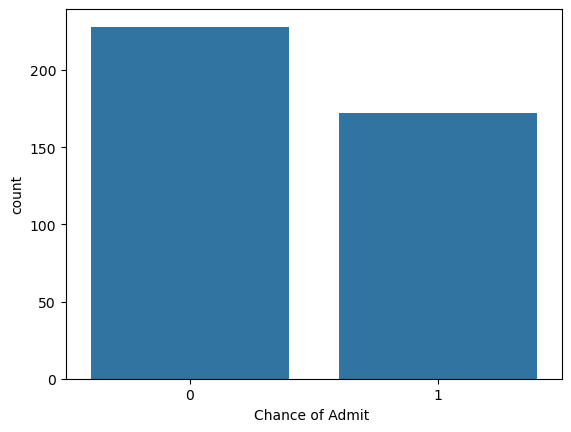

In [21]:
snp.countplot(x=y)

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)

In [25]:
x_train


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
250,251,320,104,3,3.0,2.5,8.57,1
63,64,315,107,2,4.0,3.0,8.50,1
312,313,311,107,4,4.5,4.5,9.00,1
159,160,297,100,1,1.5,2.0,7.90,0
283,284,321,111,3,2.5,3.0,8.90,1
...,...,...,...,...,...,...,...,...
323,324,305,102,2,2.0,2.5,8.18,0
192,193,322,114,5,4.5,4.0,8.94,1
117,118,290,104,4,2.0,2.5,7.46,0
47,48,339,119,5,4.5,4.0,9.70,0


In [27]:
y_train

250    0
63     0
312    1
159    0
283    1
      ..
323    0
192    1
117    0
47     1
172    1
Name: Chance of Admit , Length: 300, dtype: int32

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)


DecisionTreeClassifier(random_state=0)

In [31]:
y_predict = classifier.predict(x_test)
y_predict

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [33]:
result = pd.DataFrame({
    'actual':y_test,'predicted':y_predict
})
result

,actual,predicted
132,0,0
309,0,0
341,1,1
196,0,0
246,0,1
...,...,...
146,0,0
135,1,1
390,0,0
264,0,0


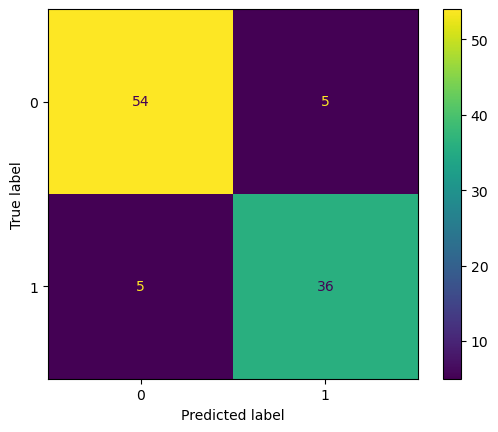

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report

ConfusionMatrixDisplay.from_predictions(y_test,y_predict)




In [37]:
accuracy_score(y_test,y_predict)


0.9

In [39]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



[Text(0.565625, 0.95, 'CGPA <= 8.655\ngini = 0.492\nsamples = 300\nvalue = [169, 131]\nclass = NA'),
 Text(0.365625, 0.85, 'LOR  <= 4.25\ngini = 0.14\nsamples = 159\nvalue = [147, 12]\nclass = NA'),
 Text(0.25625, 0.75, 'GRE Score <= 319.5\ngini = 0.089\nsamples = 150\nvalue = [143, 7]\nclass = NA'),
 Text(0.1625, 0.65, 'SOP <= 4.75\ngini = 0.056\nsamples = 138\nvalue = [134, 4]\nclass = NA'),
 Text(0.1, 0.55, 'CGPA <= 8.51\ngini = 0.043\nsamples = 135\nvalue = [132, 3]\nclass = NA'),
 Text(0.05, 0.45, 'SOP <= 3.25\ngini = 0.017\nsamples = 119\nvalue = [118, 1]\nclass = NA'),
 Text(0.025, 0.35, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]\nclass = NA'),
 Text(0.075, 0.35, 'GRE Score <= 310.5\ngini = 0.064\nsamples = 30\nvalue = [29, 1]\nclass = NA'),
 Text(0.05, 0.25, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]\nclass = NA'),
 Text(0.1, 0.25, 'GRE Score <= 311.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = NA'),
 Text(0.075, 0.15, 'CGPA <= 8.355\ngini = 0.5\nsamples = 2\nvalue = 

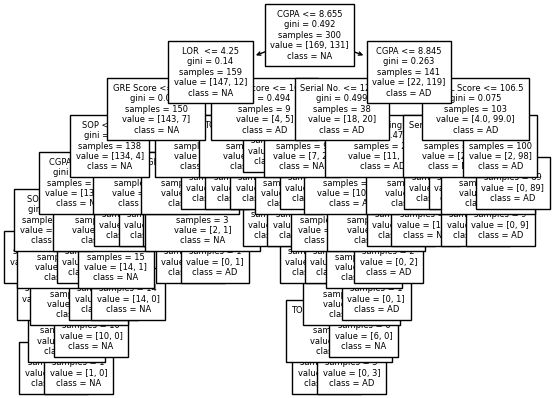

In [41]:
from sklearn.tree import plot_tree
plt.figure()

plot_tree(classifier,fontsize=6,filled=False,rounded=False,feature_names=x.columns,class_names=['NA','AD'])